# Importing packages

In [2]:
#Imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [3]:
#estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn import linear_model

In [4]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [5]:
#cross validation
from sklearn.model_selection import train_test_split

In [6]:
#preprocessing
from sklearn import preprocessing

# Preparing Data

## Import Data

In [7]:
# Import data
credit = pd.read_csv('creditdummies.csv', header =1)

# See header of data
credit.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_3_MONTH,PAY_6_4_MONTH,PAY_6_5_MONTH,PAY_6_6_MONTH,PAY_6_7_MONTH,PAY_6_8_MONTH,PAY_6_NOCONS,PAY_6_PAIDFULL,PAY_6_PAIDINFULL,DEFAULT
0,20000,24,3913,3102,689,0,0,0,0,689,...,0,0,0,0,0,0,0,1,0,1
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,0,0,0,0,0,0,1
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,0,0,0,0,0,0,1,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,0,0,0,0,0,0,1,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,0,0,0,0,0,0,1,0


In [8]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 89 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LIMIT_BAL         30000 non-null  int64
 1   AGE               30000 non-null  int64
 2   BILL_AMT1         30000 non-null  int64
 3   BILL_AMT2         30000 non-null  int64
 4   BILL_AMT3         30000 non-null  int64
 5   BILL_AMT4         30000 non-null  int64
 6   BILL_AMT5         30000 non-null  int64
 7   BILL_AMT6         30000 non-null  int64
 8   PAY_AMT1          30000 non-null  int64
 9   PAY_AMT2          30000 non-null  int64
 10  PAY_AMT3          30000 non-null  int64
 11  PAY_AMT4          30000 non-null  int64
 12  PAY_AMT5          30000 non-null  int64
 13  PAY_AMT6          30000 non-null  int64
 14  SEX_FEMALE        30000 non-null  int64
 15  SEX_MALE          30000 non-null  int64
 16  EDUC_GRAD         30000 non-null  int64
 17  EDUC_HS           30000 non-nul

## Scale Data

In [9]:
x = credit.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
credit_scaled = min_max_scaler.fit_transform(x)
credit_df = pd.DataFrame(credit_scaled)

credit_scaled = pd.DataFrame(data=credit_df.values, columns=credit.columns)
credit_scaled.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_3_MONTH,PAY_6_4_MONTH,PAY_6_5_MONTH,PAY_6_6_MONTH,PAY_6_7_MONTH,PAY_6_8_MONTH,PAY_6_NOCONS,PAY_6_PAIDFULL,PAY_6_PAIDINFULL,DEFAULT
0,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# RFECV
X = credit_scaled.drop('DEFAULT', axis=1)
target = credit_scaled['DEFAULT']
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

KeyboardInterrupt: 

## Creating Testing and Training Data Sets

In [14]:
#Features 
features = credit_scaled.iloc[:,0:88]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_2_MONTH,PAY_6_3_MONTH,PAY_6_4_MONTH,PAY_6_5_MONTH,PAY_6_6_MONTH,PAY_6_7_MONTH,PAY_6_8_MONTH,PAY_6_NOCONS,PAY_6_PAIDFULL,PAY_6_PAIDINFULL
0,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
#Dependent variable 
depVar = credit_scaled['DEFAULT']

### Create training set

In [16]:
#Training Set (70%)
credit_scaled_train = (features[:21000])
credit_scaled_train.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_2_MONTH,PAY_6_3_MONTH,PAY_6_4_MONTH,PAY_6_5_MONTH,PAY_6_6_MONTH,PAY_6_7_MONTH,PAY_6_8_MONTH,PAY_6_NOCONS,PAY_6_PAIDFULL,PAY_6_PAIDINFULL
0,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
#Dependent Variable Training Set (y Training)
depVar_train = depVar[: 21000]
depVar_train_count = len(depVar_train.index)
print('The number of observations in the Y training set are:',str(depVar_train_count))
depVar_train.head()

The number of observations in the Y training set are: 21000


0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: DEFAULT, dtype: float64

### Create Testing set

In [18]:
#Testing Set (X Testing)
credit_scaled_test = features[-9000:]
credit_scaled_test_count = len(credit_scaled_test.index)
print('The number of observations in the feature testing set is:',str(credit_scaled_test_count))
print(credit_scaled_test.head())

The number of observations in the feature testing set is: 9000
       LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
21000   0.020202  0.258621   0.146519   0.066961   0.086345   0.161240   
21001   0.272727  0.327586   0.304223   0.241647   0.189790   0.340331   
21002   0.252525  0.275862   0.260317   0.178309   0.098180   0.181979   
21003   0.191919  0.189655   0.288194   0.220668   0.131306   0.160138   
21004   0.070707  0.189655   0.216635   0.128193   0.123269   0.223582   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_6_2_MONTH  \
21000   0.081422   0.260979  0.000893  0.000000  ...            0.0   
21001   0.268083   0.408545  0.011448  0.005344  ...            0.0   
21002   0.094646   0.273118  0.003667  0.003571  ...            0.0   
21003   0.080648   0.260979  0.008700  0.002375  ...            0.0   
21004   0.154468   0.317023  0.003434  0.002378  ...            1.0   

       PAY_6_3_MONTH  PAY_6_4_MONTH  PAY_6_5_MONTH  PAY_6_6_MONTH

### Establishing Ground Truth

In [19]:
#Ground Truth (y_test) 
depVar_test = depVar[-9000:]
depVar_test_count = len(depVar_test.index)
print('The number of observations in the Y training set are:',str(depVar_test_count))
depVar_test.head()

The number of observations in the Y training set are: 9000


21000    0.0
21001    1.0
21002    0.0
21003    1.0
21004    1.0
Name: DEFAULT, dtype: float64

### Cross Validation 

In [20]:
credit_scaled_train, credit_scaled_test, depVar_train, depVar_test = train_test_split(credit_scaled_train, depVar_train)
credit_scaled_train.shape, credit_scaled_test.shape

((15750, 88), (5250, 88))

# Building Models

## Random Forest

In [21]:
modelRF = RandomForestClassifier()
modelRF.fit(credit_scaled_train, depVar_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
# Training scores 
print(cross_val_score(modelRF, credit_scaled_train, depVar_train))

[0.81587302 0.80253968 0.80857143 0.81206349 0.80952381]


In [23]:
# Model Score
modelRF.score(credit_scaled_train, depVar_train)

0.9994920634920635

## Suport Vector Machine

In [26]:
modelSVC = SVC()
modelSVC.fit(credit_scaled_train, depVar_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
# Training scores 
print(cross_val_score(modelSVC, credit_scaled_train, depVar_train))

[0.82095238 0.80984127 0.81396825 0.81936508 0.81142857]


In [28]:
# Model Score
modelSVC.score(credit_scaled_train, depVar_train)

0.8208253968253968

## Stochastic Gradient Descent

In [23]:
modelSGD = SGDClassifier()
modelSGD.fit(credit_scaled_train, depVar_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
print(cross_val_score(modelSGD, credit_scaled_train, depVar_train))

[0.81174603 0.81174603 0.81301587 0.80888889 0.81777778]


In [25]:
# Model Score
modelSGD.score(credit_scaled_train, depVar_train)

0.8134603174603174

# Predictions and Evaluation of Results

## Random Forest

In [81]:
predictionsRF = modelRF.predict(credit_scaled_test)
predRsquaredRF = r2_score(depVar_test,predictionsRF)
rmseRF = sqrt(mean_squared_error(depVar_test, predictionsRF))
print('Random Forest R Squared: %.3f' % predRsquaredRF)
print('Random Forest RMSE: %.3f' % rmseRF)

Random Forest R Squared: -0.103
Random Forest RMSE: 0.438


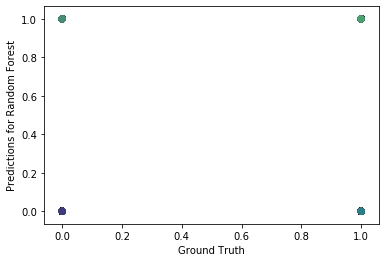

In [82]:
np.random.seed(19680801)

plt.scatter(depVar_test, predictionsRF, c = np.random.rand(5250), alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions for Random Forest')
plt.show();

## Support Vector Machine

In [65]:
predictionsSVC = modelSVC.predict(credit_scaled_test)
predRsquaredSVC = r2_score(depVar_test,predictionsSVC)
rmseSVC = sqrt(mean_squared_error(depVar_test, predictionsSVC))
print('Support Vector Classifier R Squared: %.3f' % predRsquaredSVC)
print('Support Vector Classifier RMSE: %.3f' % rmseSVC)

Support Vector Classifier R Squared: -0.067
Support Vector Classifier RMSE: 0.431


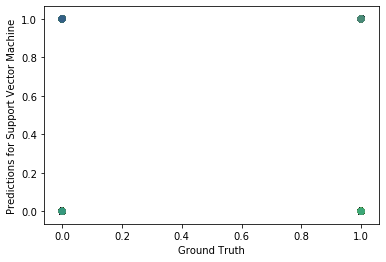

In [89]:
np.random.seed(19680802)

plt.scatter(depVar_test, predictionsSVC, c = np.random.rand(5250), alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions for Support Vector Machine')
plt.show();

## Stochastic Gradient Descent

In [87]:
predictionsSGD = modelSGD.predict(credit_scaled_test)
predRsquaredSGD = r2_score(depVar_test,predictionsSGD)
rmseSGD = sqrt(mean_squared_error(depVar_test, predictionsSGD))
print('Stochastic Gradient Descent R Squared: %.3f' % predRsquaredSGD)
print('Stochastic Gradient Descent RMSE: %.3f' % rmseSGD)

Stochastic Gradient Descent R Squared: -0.075
Stochastic Gradient Descent RMSE: 0.432


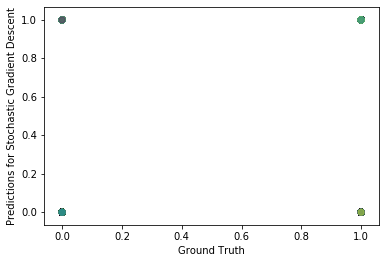

In [90]:
np.random.seed(19680803)

plt.scatter(depVar_test, predictionsSGD, c = np.random.rand(5250), alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions for Stochastic Gradient Descent')
plt.show();

# Model Tuning for SVM

## Tuning Kernel

In [31]:
modelSVC2 = SVC(kernel = 'linear')
modelSVC2.fit(credit_scaled_train, depVar_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
# Training scores 
print("Training scores")
print(cross_val_score(modelSVC2, credit_scaled_train, depVar_train))

Training scores
[0.81936508 0.80698413 0.81238095 0.81904762 0.80984127]


In [33]:
# Model Score
print("Model Score")
modelSVC2.score(credit_scaled_train, depVar_train)

Model Score


0.8153650793650794

## Tuning C

In [34]:
modelSVC3 = SVC(C=100)
modelSVC3.fit(credit_scaled_train, depVar_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
# Training scores 
print("Training scores")
print(cross_val_score(modelSVC3, credit_scaled_train, depVar_train))

Training scores
[0.80507937 0.78984127 0.78603175 0.8        0.79238095]


In [37]:
# Model Score
print("Model Score")
modelSVC3.score(credit_scaled_train, depVar_train)

Model Score


0.8624126984126984

In [38]:
modelSVC4 = SVC(C=200)
modelSVC4.fit(credit_scaled_train, depVar_train)

SVC(C=200, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
# Training scores 
print("Training scores")
print(cross_val_score(modelSVC4, credit_scaled_train, depVar_train))

Training scores
[0.80571429 0.78412698 0.78444444 0.79714286 0.78825397]


In [40]:
# Model Score
print("Model Score")
modelSVC4.score(credit_scaled_train, depVar_train)

Model Score


0.8670476190476191

In [41]:
modelSVC5 = SVC(C=1000)
modelSVC5.fit(credit_scaled_train, depVar_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
# Training scores 
print("Training scores")
print(cross_val_score(modelSVC5, credit_scaled_train, depVar_train))

Training scores
[0.79936508 0.7752381  0.7752381  0.79047619 0.78603175]


In [43]:
# Model Score
print("Model Score")
modelSVC5.score(credit_scaled_train, depVar_train)

Model Score


0.8806984126984126

# Prediction and Evaluation of Results

In [44]:
predictionsSVC5 = modelSVC.predict(credit_scaled_test)
predRsquaredSVC5 = r2_score(depVar_test,predictionsSVC5)
rmseSVC5 = sqrt(mean_squared_error(depVar_test, predictionsSVC5))
print('Support Vector Classifier R Squared: %.3f' % predRsquaredSVC5)
print('Support Vector Classifier RMSE: %.3f' % rmseSVC5)

Support Vector Classifier R Squared: -0.086
Support Vector Classifier RMSE: 0.440


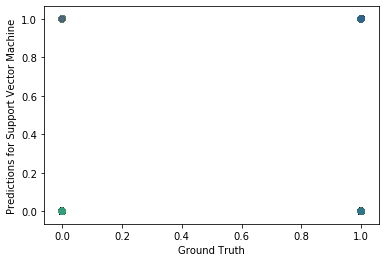

In [45]:
np.random.seed(19680802)

plt.scatter(depVar_test, predictionsSVC5, c = np.random.rand(5250), alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions for Support Vector Machine')
plt.show();